In [4]:
import timetable_scheduler.solution
from timetable_scheduler import create_dataset, timing, process_image_manager
from timetable_scheduler.matrix_operators import matrix_cut_and_paste_translation, matrix_inner_translation, matrix_transposition, MatrixOperator


In [5]:
import numpy as np

@timing
def operator_time_measurement(matrix_operator: MatrixOperator, test_matrix: np.ndarray, iterations: int):
    for i in range(iterations):
        matrix_operator(test_matrix)

### Time complexity test setup
For every matrix operator perform time complexity tests for k different availability probability levels.
For every availability probability level perform m tests with n iterations each.

Let k = 3, m = 20, n = 1000.
My dataset of choice is the 5th term.

In [6]:
# k different availability probability levels
probability_levels = [0.5, 0.7, 0.9]
# m tests and n iterations
m = 20
n = 1000
dataset = 5

matrix_operators = [matrix_cut_and_paste_translation, matrix_inner_translation, matrix_transposition]
operator_labels = ['matrix_cut_and_paste_translation', 'matrix_inner_translation', 'matrix_transposition']

test_results = {operator_label: [] for operator_label in operator_labels}

for matrix_operator, operator_label in zip(matrix_operators, operator_labels):
    for probability_level in probability_levels:
        # test matrix setup
        create_dataset(term_id=dataset, room_p=probability_level, lecturer_p=probability_level)
        process_image_manager.reset_process_image()
        test_solution = timetable_scheduler.solution.Solution()
        test_matrix = test_solution.matrix
        # perform m tests with n iterations
        results = []
        for test in range(m):
            _, total_time = operator_time_measurement(matrix_operator, test_matrix, n)
            # save the average time for each run
            results.append(total_time / n)
        test_results[operator_label] += results


### Data Analysis

Studied properties:
* matrix operator runtimes
* the influence of matrix operators on the cost function
* the sequence of matrix operators



#### Matrix operator runtimes

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

operator_column = []
average_time_column = []
for operator_label, values in test_results.items():
    operator_column += [operator_label] * len(values)
    average_time_column += list(values)

df = pd.DataFrame(np.array([operator_column, average_time_column]).T, columns=['matrix operator', 'runtime'])
# get time in milliseconds
df['runtime'] = df['runtime'].astype('float') * 10e3
df.head()

,matrix operator,runtime
0,matrix_cut_and_paste_translation,13.889859
1,matrix_cut_and_paste_translation,14.349864
2,matrix_cut_and_paste_translation,15.549881
3,matrix_cut_and_paste_translation,16.359956
4,matrix_cut_and_paste_translation,14.269841


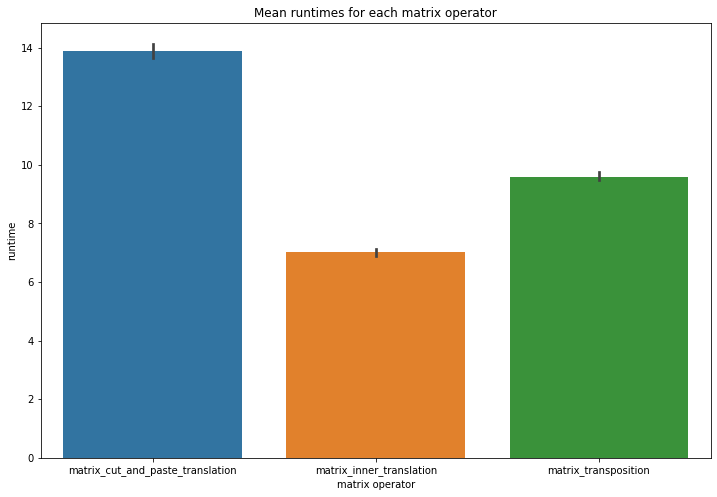

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x='matrix operator', y='runtime', data=df)
plt.title('Mean runtimes for each matrix operator')
plt.show()

#### The influence of matrix operators on the cost function



In [ ]:
import json
